<h3>タイタニック号のデータを読み込む</h3>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# ---------------------------------------------
# PassengerId : 乗客識別ユニークID
# Survived : 生存フラグ（0=死亡、1=生存）
# Pclass : チケットクラス
# Name : 乗客の名前
# Sex : 性別（male=男性、female＝女性）
# Age : 年齢
# SibSp : タイタニックに同乗している兄弟/配偶者の数
# parch : タイタニックに同乗している親/子供の数
# ticket : チケット番号
# fare : 料金
# cabin : 客室番号
# Embarked : 出港地（タイタニックへ乗った港）
# ---------------------------------------------
# データ読み込み
train = pd.read_csv('csv_data/train.csv',index_col = 0)  #passenger idを合体させるかい否か
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


<h3>タイタニック号を把握</h3>

(array([[ 80.,  97., 372.],
        [216., 184., 491.]]),
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <a list of 2 BarContainer objects>)

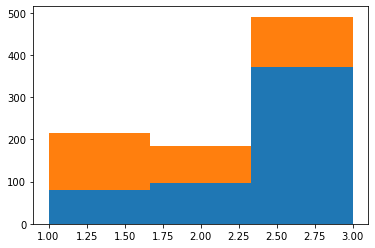

In [9]:
# 客室レベルでの生存割合
# オレンジは生存、青色は死亡を表している
split_data = []
for survived in [0, 1]:
    split_data.append(train[train.Survived==survived])

temp = [i["Pclass"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=3)

<h3>データを処理して現状を把握する</H3>

In [10]:
# 性別の置き換え
train = pd.read_csv('csv_data/train.csv',index_col = 0).replace("male",0).replace("female",1) 

# 欠損値データを削除
train = train.dropna()

# Name を削除
train = train.drop("Name",axis = 1)

# 変更後のデータを表示
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,1,35.0,1,0,113803,53.1000,C123,S
7,0,1,0,54.0,0,0,17463,51.8625,E46,S
11,1,3,1,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,1,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
872,1,1,1,47.0,1,1,11751,52.5542,D35,S
873,0,1,0,33.0,0,0,695,5.0000,B51 B53 B55,S
880,1,1,1,56.0,0,1,11767,83.1583,C50,C


(array([[ 52.,   3.,   5.],
        [158.,  15.,  10.]]),
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <a list of 2 BarContainer objects>)

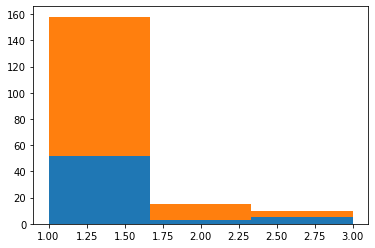

In [11]:
# 客室レベルでの生存割合
# オレンジは生存、青色は死亡を表している
split_data = []
for survived in [0,1]:
    split_data.append(train[train.Survived==survived])

temp = [i["Pclass"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=3)

<h3>データ処理を再度行う</h3>

In [12]:
# 上記のデータは、もともとのデータでの生存割合と大きく異なることから
# 上記の削除方法が間違っている可能性が大きいことを示唆している

# もう一度削除のやり直しを行う
# 性別の置き換え
train = pd.read_csv('csv_data/train.csv',index_col = 0).replace("male",0).replace("female",1)

# Cabinデータを削除
train = train.drop("Cabin",axis = 1)

# Name を削除
train = train.drop("Name",axis = 1)

train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,S
2,1,1,1,38.0,1,0,PC 17599,71.2833,C
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,1,35.0,1,0,113803,53.1000,S
5,0,3,0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,211536,13.0000,S
888,1,1,1,19.0,0,0,112053,30.0000,S
889,0,3,1,NaN,1,2,W./C. 6607,23.4500,S


(array([[ 80.,  97., 372.],
        [216., 184., 491.]]),
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <a list of 2 BarContainer objects>)

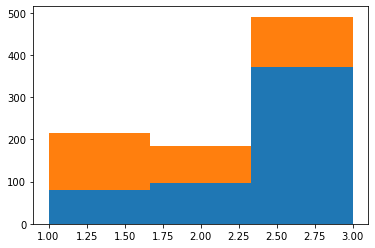

In [20]:
# 客室レベルでの生存割合
# オレンジは生存、青色は死亡を表している
split_data = []
for survived in [0,1]:
    split_data.append(train[train.Survived==survived])

temp = [i["Pclass"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=3)

(array([[ 13.,  13.,   8.,  63.,  80.,  66.,  47.,  39.,  30.,  23.,  14.,
          11.,  10.,   3.,   4.,   0.],
        [ 44.,  20.,  19.,  96., 122., 108.,  88.,  67.,  47.,  39.,  24.,
          18.,  14.,   3.,   4.,   1.]]),
 array([ 0.42   ,  5.39375, 10.3675 , 15.34125, 20.315  , 25.28875,
        30.2625 , 35.23625, 40.21   , 45.18375, 50.1575 , 55.13125,
        60.105  , 65.07875, 70.0525 , 75.02625, 80.     ]),
 <a list of 2 BarContainer objects>)

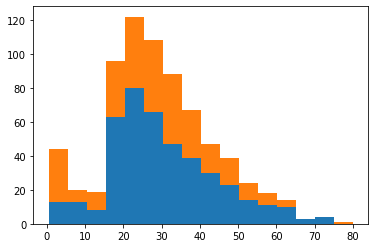

In [21]:
# さらに、年齢による生存割合を見ていく。
temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=16)

In [22]:
# 次回以降 処理をするために現在の欠損値を確認
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64